In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
data = pd.read_csv("../data/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

battery_power
Total energy a battery can store in one time measured in mAh

blue
Has bluetooth or not

clock_speed
speed at which microprocessor executes instructions

dual_sim
Has dual sim support or not

fc
Front Camera mega pixels

four_g
Has 4G or not

int_memory
Internal Memory in Gigabytes

m_dep
Mobile Depth in cm

mobile_wt
Weight of mobile phone

n_cores
Number of cores of processor

pc
Primary Camera mega pixels

px_height
Pixel Resolution Height

px_width
Pixel Resolution Width

ram
Random Access Memory in Mega Bytes

sc_h
Screen Height of mobile in cm

sc_w
Screen Width of mobile in cm

talk_time
longest time that a single battery charge will last when you are

three_g
Has 3G or not

touch_screen
Has touch screen or not

wifi
Has wifi or not

price_range
This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [4]:
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [5]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [6]:
data['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [7]:
print(data['price_range'].value_counts())

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


<AxesSubplot:ylabel='price_range'>

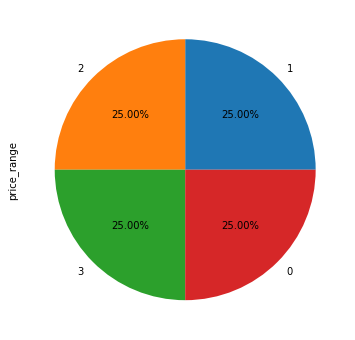

In [8]:
plt.figure(figsize=(10,6))
data['price_range'].value_counts().plot.pie(autopct='%.2f%%')

<AxesSubplot:>

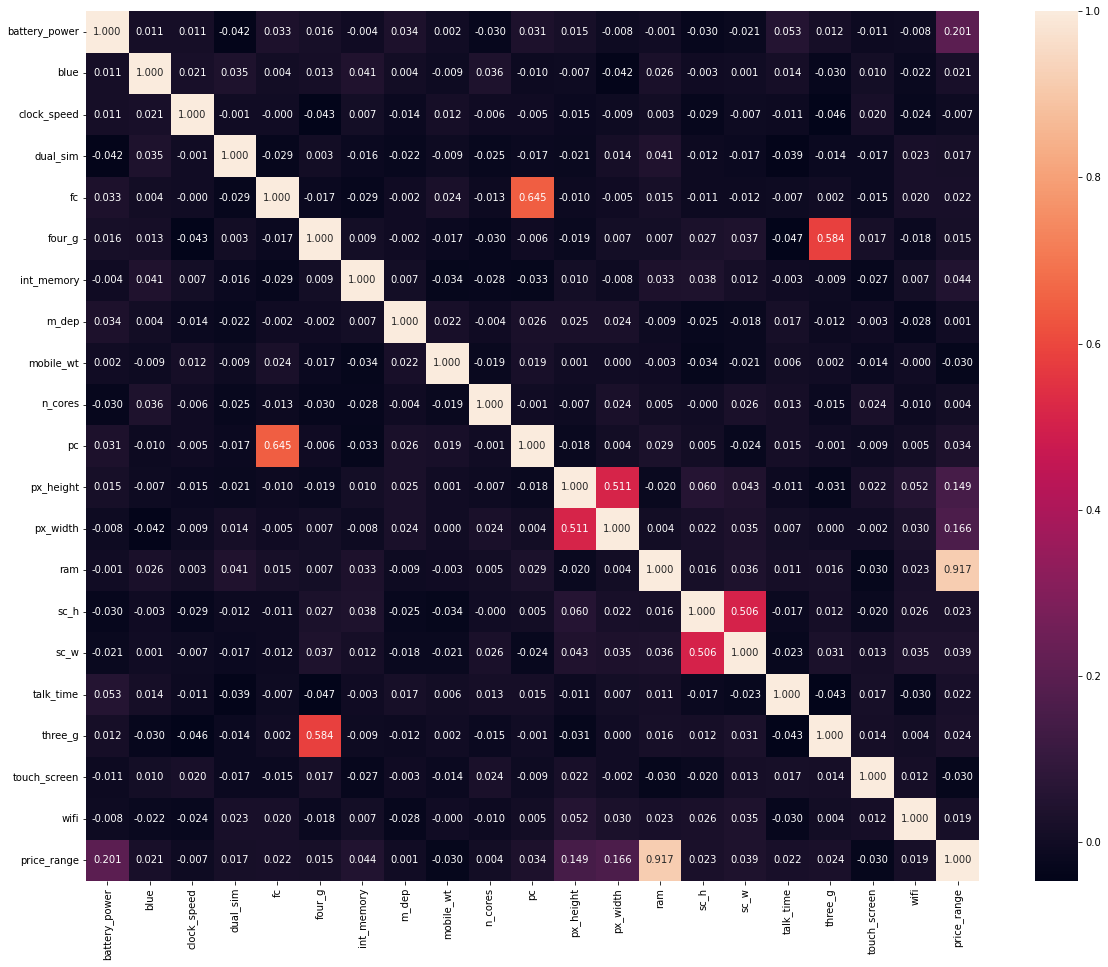

In [120]:
fig, ax = plt.subplots(figsize = (20, 16))
sns.heatmap(data.corr(), ax = ax, annot = True, fmt = ".3f")

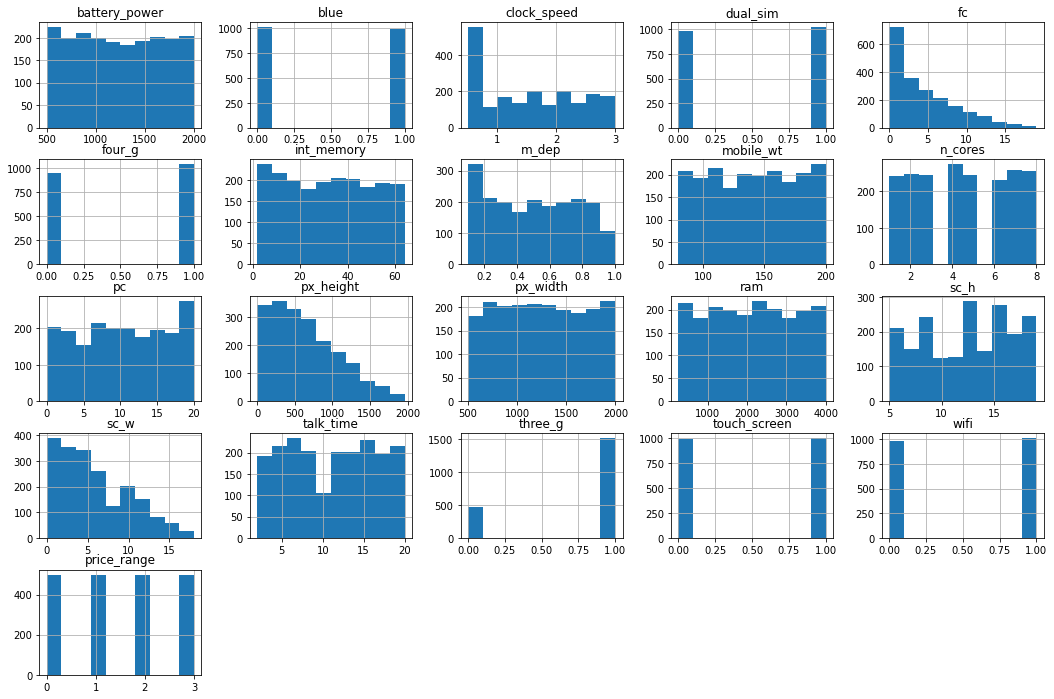

In [18]:
bla = data.hist(figsize=(18,12))

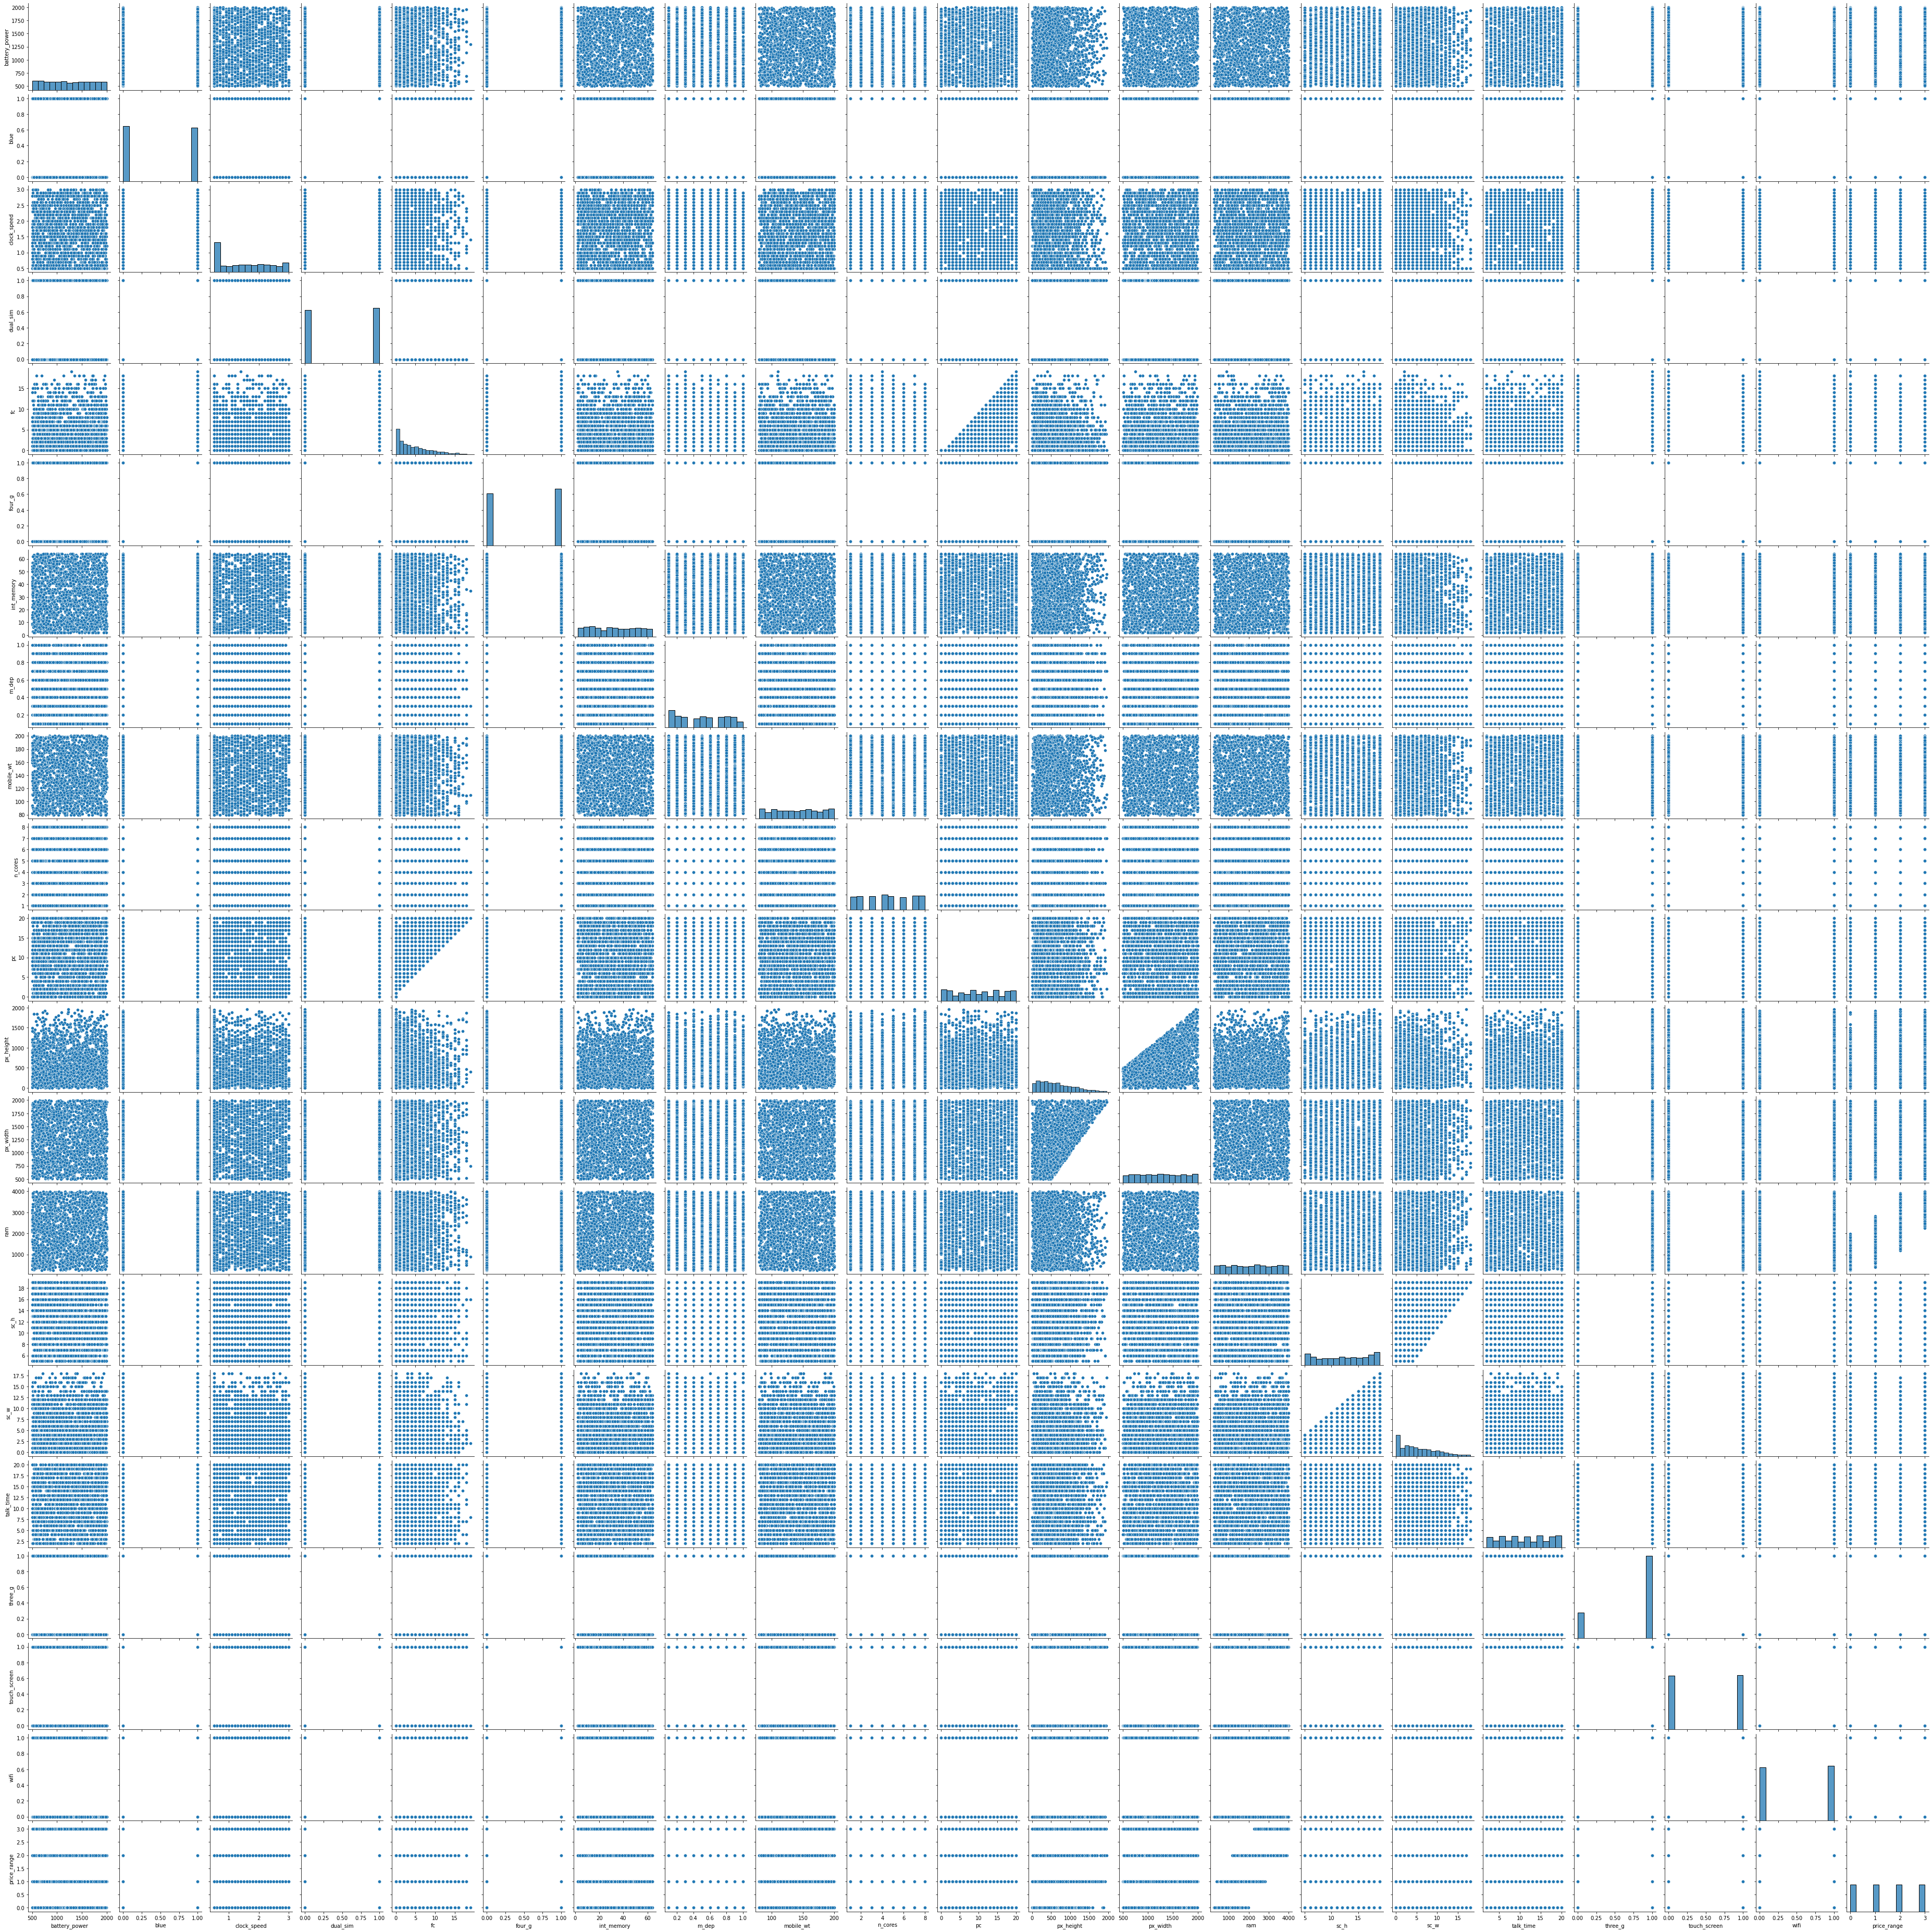

In [17]:
sns.pairplot(data)

<AxesSubplot:xlabel='price_range', ylabel='ram'>

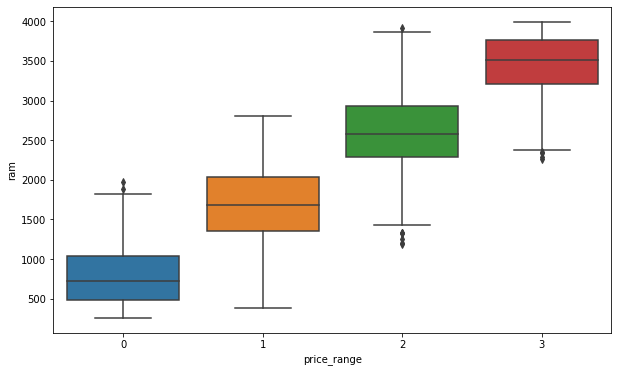

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(y=data['ram'],x=data['price_range'])

In [9]:
def z_score(df):
    df_std = df.copy()
    for column in df_std.columns[:-1]:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [10]:
normalized_data = z_score(data)

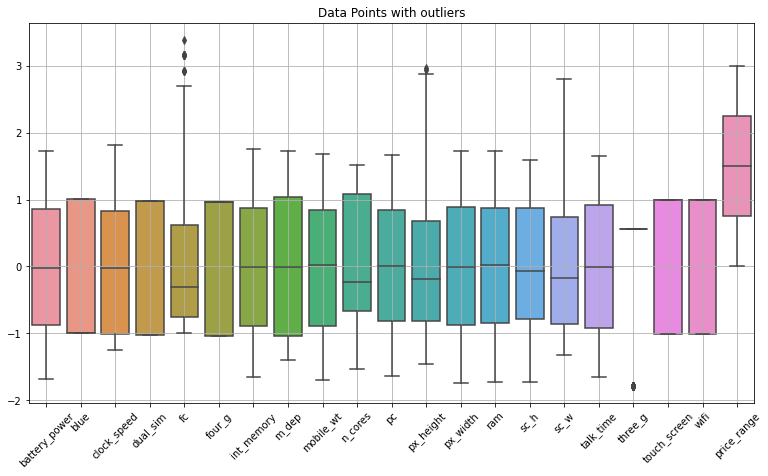

In [11]:
plt.figure(figsize=(13,7))
plt.title("Data Points with outliers")
sns.boxplot(data = normalized_data)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

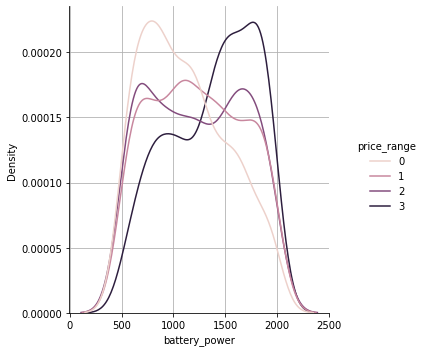

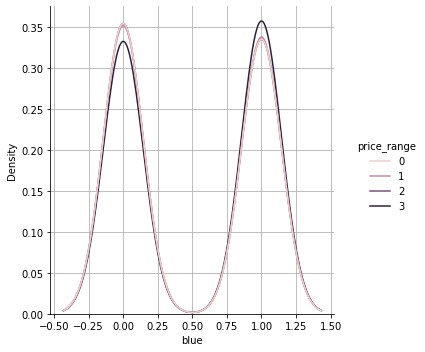

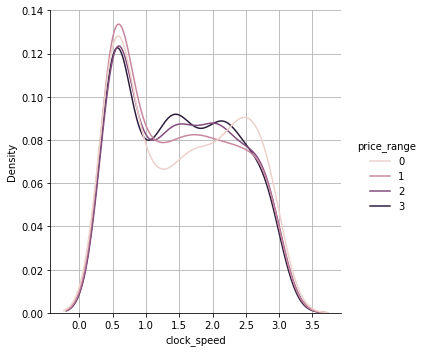

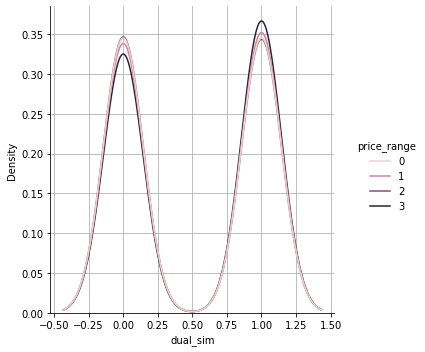

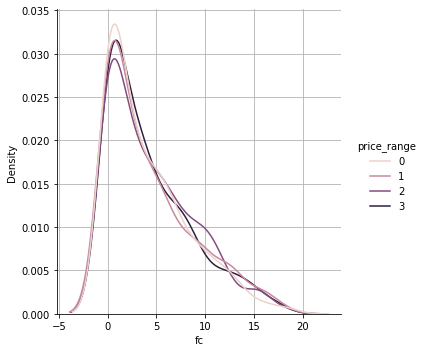

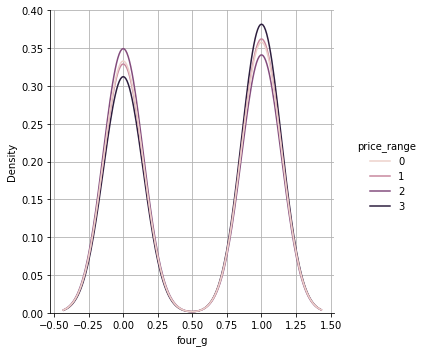

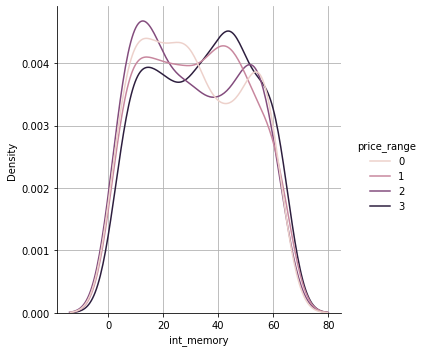

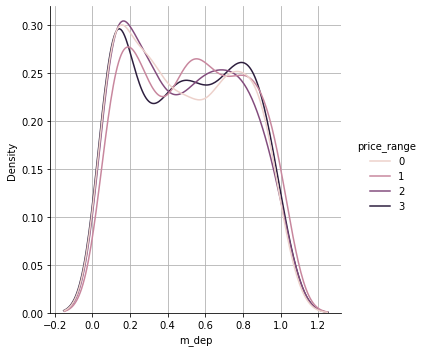

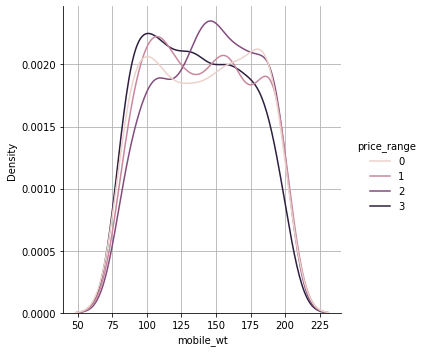

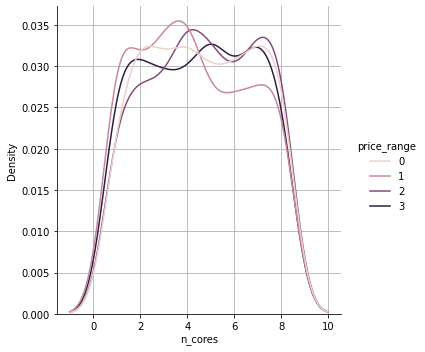

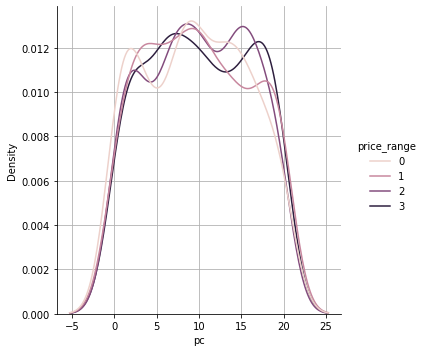

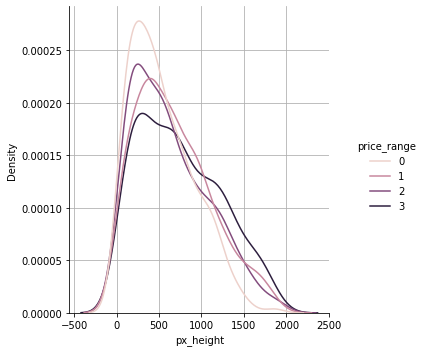

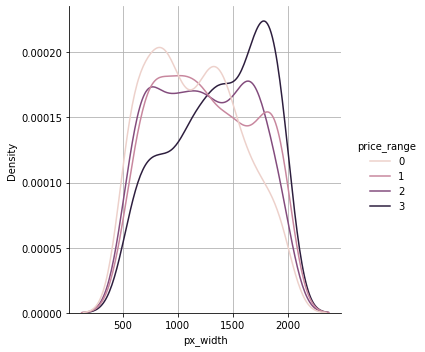

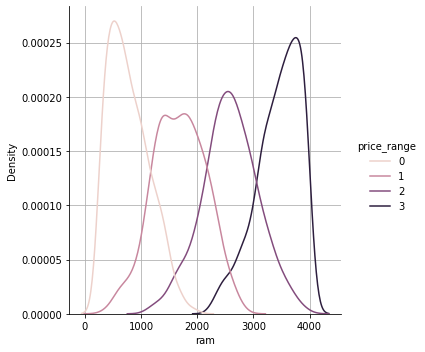

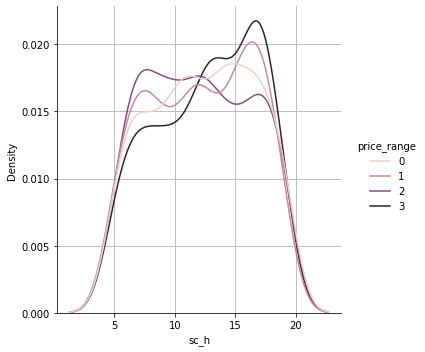

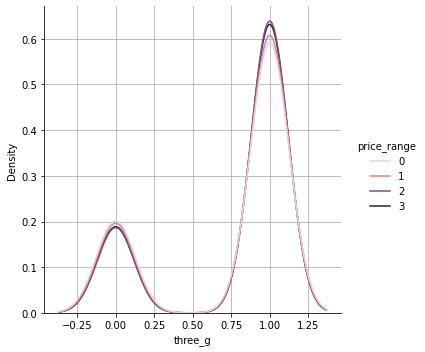

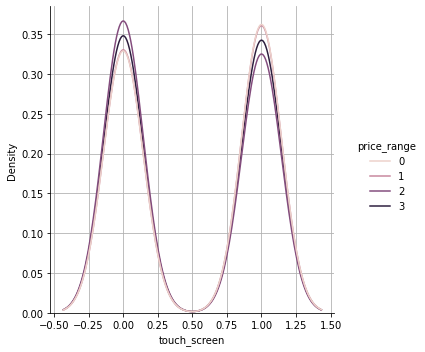

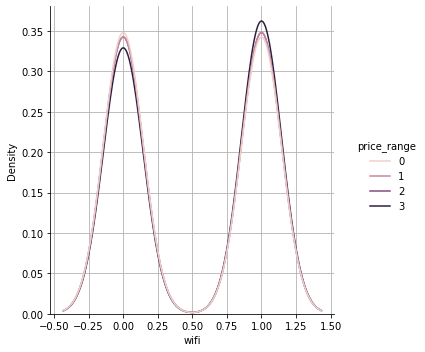

In [103]:
for colm in data.select_dtypes(np.number).columns[:-1]:
    sns.displot(data, x = colm,  hue="price_range", kind="kde", fill=False)
    plt.grid()
    plt.show()

In [110]:
def log_normalization(final_dataset):
    for column in final_dataset.columns[:-1]:
        final_dataset[column] = final_dataset[column].map(lambda i: np.log(i) if i > 0 else 0) 

    return final_dataset

In [111]:
data_BP = log_normalization(data)

In [141]:
data = pd.read_csv("../data/train.csv")
bla = data.drop('price_range', axis=1)

In [142]:
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [143]:
# split the data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bla, data['price_range'], test_size=0.2, random_state=42)

In [144]:
import tensorflow as tf
from tensorflow import keras

In [145]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(x_test[:10])
print('Predictions:', predictions)

Epoch 1/100
50/50 [==============================] - 2s 10ms/step - loss: 48.8632 - accuracy: 0.3744 - val_loss: 8.1240 - val_accuracy: 0.4750
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 7.9217 - accuracy: 0.4656 - val_loss: 7.6813 - val_accuracy: 0.3700
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 5.4322 - accuracy: 0.4650 - val_loss: 6.7746 - val_accuracy: 0.4700
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 4.4863 - accuracy: 0.4906 - val_loss: 6.5290 - val_accuracy: 0.5150
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 4.7911 - accuracy: 0.4956 - val_loss: 2.5763 - val_accuracy: 0.5875
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 2.3894 - accuracy: 0.5406 - val_loss: 2.6444 - val_accuracy: 0.5275
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 4.7122 - accuracy: 0.5013 - val_loss: 3.6619 - val_accuracy: 0.4850
Epoch 8/100

Epoch 59/100
50/50 [==============================] - 0s 5ms/step - loss: 0.9470 - accuracy: 0.6906 - val_loss: 0.9178 - val_accuracy: 0.6725
Epoch 60/100
50/50 [==============================] - 0s 5ms/step - loss: 0.9778 - accuracy: 0.6900 - val_loss: 0.9896 - val_accuracy: 0.7000
Epoch 61/100
50/50 [==============================] - 0s 6ms/step - loss: 0.9024 - accuracy: 0.7069 - val_loss: 0.9376 - val_accuracy: 0.6750
Epoch 62/100
50/50 [==============================] - 0s 5ms/step - loss: 0.9376 - accuracy: 0.6981 - val_loss: 0.7123 - val_accuracy: 0.6950
Epoch 63/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6757 - accuracy: 0.7300 - val_loss: 0.7879 - val_accuracy: 0.6825
Epoch 64/100
50/50 [==============================] - 0s 6ms/step - loss: 0.7879 - accuracy: 0.7013 - val_loss: 0.6830 - val_accuracy: 0.7250
Epoch 65/100
50/50 [==============================] - 0s 5ms/step - loss: 0.7232 - accuracy: 0.7287 - val_loss: 1.1135 - val_accuracy: 0.6425
Epoch 

In [146]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(x_test[:10])
print('Predictions:', predictions)

Epoch 1/100
50/50 [==============================] - 2s 11ms/step - loss: 24.1967 - accuracy: 0.4044 - val_loss: 4.9539 - val_accuracy: 0.4725
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 6.2156 - accuracy: 0.4725 - val_loss: 3.4692 - val_accuracy: 0.4925
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 2.8803 - accuracy: 0.5219 - val_loss: 1.8455 - val_accuracy: 0.5575
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 5.4667 - accuracy: 0.4925 - val_loss: 5.3775 - val_accuracy: 0.4550
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 3.1481 - accuracy: 0.5194 - val_loss: 2.0636 - val_accuracy: 0.6100
Epoch 6/100
50/50 [==============================] - 0s 6ms/step - loss: 3.3069 - accuracy: 0.5213 - val_loss: 2.1232 - val_accuracy: 0.5350
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 2.3706 - accuracy: 0.5375 - val_loss: 2.7751 - val_accuracy: 0.4875
Epoch 8/100

Epoch 59/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6037 - accuracy: 0.7231 - val_loss: 0.7759 - val_accuracy: 0.6300
Epoch 60/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5742 - accuracy: 0.7244 - val_loss: 0.6606 - val_accuracy: 0.6950
Epoch 61/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5580 - accuracy: 0.7369 - val_loss: 0.6013 - val_accuracy: 0.7600
Epoch 62/100
50/50 [==============================] - 0s 6ms/step - loss: 0.5559 - accuracy: 0.7450 - val_loss: 0.6377 - val_accuracy: 0.7150
Epoch 63/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5583 - accuracy: 0.7425 - val_loss: 0.8960 - val_accuracy: 0.6575
Epoch 64/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5954 - accuracy: 0.7325 - val_loss: 0.6291 - val_accuracy: 0.7150
Epoch 65/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5600 - accuracy: 0.7387 - val_loss: 0.6009 - val_accuracy: 0.7275
Epoch 

In [164]:
data = pd.read_csv("../data/train.csv")
bla = data.drop('price_range', axis=1)

In [165]:
bla

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2   2         20       756  2549     9     7   
1       0.7        136        3   6        905      1988  2631    17     3   
2       0.9        145        5   6       1263      1716  2603    11     2   
3       0.8        131        6   9       1216      1786  2769    16     8   
4       0.6        141        2  14       1208      1212  1411     8     2   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  
0            19        0             0     1  
1             7        1             1     0  
2             9        1             1     0  
3            11        1             0     0  
4            15        1             1     0  
...         ...      ...           ...   ...  
1995         19        1             1     0  
1996         16        1             1     1  
1997          5        1             1     0  
1998         19        1             1     1  
1999          2        1             1     1  

[2000 rows x 20 columns]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(bla, data['price_range'], test_size=0.2, random_state=42)

In [175]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 4)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.softmax(x)
        return x

# Create an instance of the model
model = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.to_numpy()).float()
y_train_tensor = torch.tensor(y_train.to_numpy()).long()
X_test_tensor = torch.tensor(X_test.to_numpy()).float()
y_test_tensor = torch.tensor(y_test.to_numpy()).long()

# Train the model
for epoch in range(100):
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print statistics every 10 epochs
    if epoch % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    total = y_test_tensor.size(0)
    correct = (predicted == y_test_tensor).sum().item()
    test_acc = correct / total
    print('Test accuracy: {:.2f}%'.format(test_acc * 100))

# Make predictions
with torch.no_grad():
    outputs = model(X_test_tensor[:])
    _, predicted = torch.max(outputs.data, 1)
    print('Predictions:', predicted)

Epoch [1/100], Loss: 1.4987
Epoch [11/100], Loss: 1.3153
Epoch [21/100], Loss: 1.3052
Epoch [31/100], Loss: 1.3062
Epoch [41/100], Loss: 1.3006
Epoch [51/100], Loss: 1.3012
Epoch [61/100], Loss: 1.2954
Epoch [71/100], Loss: 1.2938
Epoch [81/100], Loss: 1.2906
Epoch [91/100], Loss: 1.2883
Test accuracy: 45.00%
Predictions: tensor([0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
        2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
        0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
        0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2,
        2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0,
        2, 2, 2, 0, 0, 2, 2, 0, 0, 2